# 감마함수 만들기 1

## '극한'을 어떻게 정의해야 할까?

In [74]:
e = (1 + 1 / 10000000000) ** 10000000000
print(e)

2.7182820532347876


###  e = 2.718281828459045
## 대략 맞는 것 같다

In [9]:
def euler(k):
    return (1 + 1 / k) ** k

In [12]:
print(euler(1000))
print(euler(1000000))
print(euler(1000000000))
print(euler(1000000000000))
print(euler(1000000000000000))
print(euler(1000000000000000000))

2.7169239322355936
2.7182804690957534
2.7182820520115603
2.7185234960372378
3.035035206549262
1.0


## 왜 수가 커지면 더 정확해져야 하는데 그렇지 않을까?

## => 부동 소수점 오차!!!

In [112]:
print(0.1**6)

1.0000000000000004e-06


## 1.000000000000000 "4"e-06

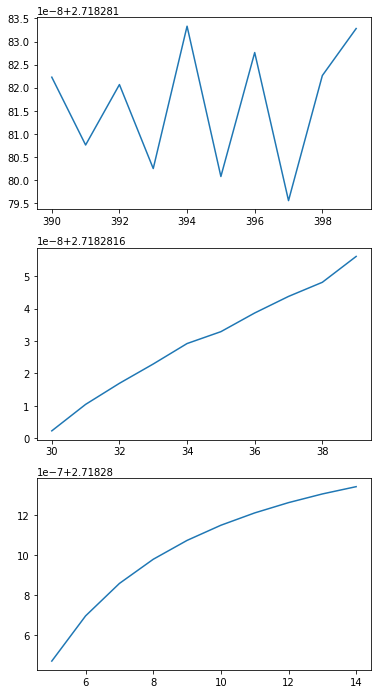

In [106]:
import matplotlib.pyplot as plt
import numpy as np

def euler2(k):
    return (1 + 1 / (200000 * k)) ** (200000 * k)

plt.figure(figsize=(6, 12))

X1 = np.arange(390, 400, 1)
Y1 = euler2(X1)
plt.subplot(311)
plt.plot(X1, Y1)

X2 = np.arange(30, 40, 1)
Y2 = euler2(X2)
plt.subplot(312)
plt.plot(X2, Y2)

X3 = np.arange(5, 15, 1)
Y3 = euler2(X3)
plt.subplot(313)
plt.plot(X3, Y3)
plt.show()

## 어떻게 하면 오차를 줄이면서 최대한 근사된 값을 구할 수 있을까?

### 묵념, 5분 27초

In [116]:
def find_pole(func, init, fin):
    result = {}
    for n in range(init, fin - 1):
        if (func(n) - func(n - 1)) * (func(n + 1) - func(n)) < 0:
            result[n] = func(n)
    return result

### 킹리적 갓심: 첫 번째 극값이 수렴하는 지점일 것이다.

In [125]:
def euler2(k):
    return (1 + 1 / (200000 * k)) ** (200000 * k)

n = 10

while find_pole(lambda x: euler2(x), n, n + 2) == {}:
    n += 1

find_pole(lambda x: euler2(x), n + 1, n + 3)

{47: 2.718281681955953}

### 과연 그럴까...?

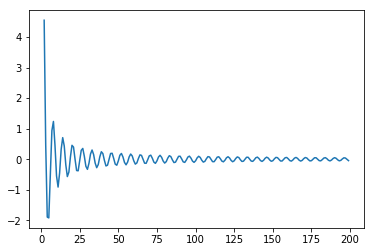

In [198]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return 10/x * np.sin(x)

X = np.arange(2, 200, 1)
Y = f(X)

plt.plot(X, Y)
plt.show()

In [199]:
n = 2

while find_pole(lambda x: f(x), n, n + 2) == {}:
    n += 1

find_pole(lambda x: f(x), n, n + 2)

{5: -1.917848549326277}

In [200]:
f(1000000)

-3.4999350217129294e-06

## 차이가 너무 크다!!

### 야리적 코심: 연속한 두 극값의 차가 매우 작으면 그나마 수렴 값에 가까울 것이다.

In [201]:
n = 2
pole = {}

while len(pole) <= 1:
    n += 1
    pole = find_pole(lambda x: f(x), n, n + 3)
    if len(pole) >= 2:
        pole_x = list(pole.keys())
        if abs(pole[pole_x[0]] - pole[pole_x[1]]) <= 0.0001:
            print(pole)
            break

KeyboardInterrupt: 

In [202]:
n

254921

### 과연 그럴까...????????

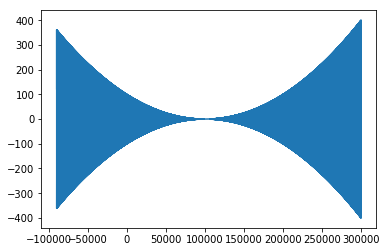

In [181]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return ((x/10000 - 10) ** 2) * np.sin(x)

X = np.arange(-90000, 300000, 0.1)
Y = f(X)

plt.plot(X, Y)
plt.show()

In [189]:
n = 100000
pole = {}

while len(pole) <= 1:
    n += 1
    pole = find_pole(lambda x: f(x), n, n + 10)
    if len(pole) >= 2:
        pole_x = list(pole.keys())
        if abs(pole[pole_x[0]] - pole[pole_x[1]]) <= 0.0001:
            print(pole)
            break

{100002: -3.694371839424459e-08, 100005: 2.4211297989056223e-07, 100008: -6.361134768028951e-07}


## 그런데... 이 함수는 발산한다....!!

In [208]:
np.e**(-0.0289644*9.8*5500/(8.314*298))

0.5325249940080579